# #imports

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb  
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
conn_params = {
    "host" : "srvdados",
    "database" : "postgres",
    "user":"compras",
    "password": "pecist@compr@s2024"
}

In [3]:
mmm = """ 
    select 
        cd_produto , vl_medmes from"D-1".prd_cd
    where cd_centrod = '01'
"""

In [4]:
a3= """
    SELECT 
        pp.cod_pro,
        po.num_fab,
        pp.dt_emissao,
        pp.qtde_ven AS vendas,
        pp.cd_loja,
        pp.preco
    FROM "D-1".prod_ped pp
    JOIN "D-1".produto po 
        ON pp.cod_pro = po.codpro
    JOIN "D-1".cliente c ON pp.codcli = c.codcli
    WHERE 
    pp.tipped = 'V' 
    and c.codcli not in ('13996','16100','18400','20000','23000','02608','24000','00270','20690','20691','20692','20693','23011','99999','88888','21097')
    and pp.codvde not in ('0100','0001','0006','2319')
    and c.codarea <> '112'
    and c.codcid <> '0501'
    and pp.cd_loja = '03'
    AND pp.dt_emissao >= DATE '2020-01-01'
"""

In [5]:
c4 = """
    SELECT 
        pp.cod_pro,
        po.num_fab,
        pp.dt_emissao,
        pp.qtde_ven AS vendas,
        pp.cd_loja,
        pp.preco
    FROM "D-1".prod_ped pp
    JOIN "D-1".produto po 
        ON pp.cod_pro = po.codpro
    JOIN "D-1".cliente c ON pp.codcli = c.codcli
    WHERE 
    pp.tipped = 'V' 
    and c.codcli not in ('13996','16100','18400','20000','23000','02608','24000','00270','20690','20691','20692','20693','23011','99999','88888','21097')
    and pp.codvde not in ('0100','0001','0006','2319')
    and c.codarea <> '112'
    and c.codcid <> '0501'
    and pp.cd_loja = '04'
    AND pp.dt_emissao >= DATE '2021-01-01'
"""

In [6]:
g5 = """
    SELECT 
        pp.cod_pro,
        po.num_fab,
        pp.dt_emissao,
        pp.qtde_ven AS vendas,
        pp.cd_loja,
        pp.preco
    FROM "D-1".prod_ped pp
    JOIN "D-1".produto po 
        ON pp.cod_pro = po.codpro
    JOIN "D-1".cliente c ON pp.codcli = c.codcli
    WHERE 
    pp.tipped = 'V' 
    and c.codcli not in ('13996','16100','18400','20000','23000','02608','24000','00270','20690','20691','20692','20693','23011','99999','88888','21097')
    and pp.codvde not in ('0100','0001','0006','2319')
    and c.codarea <> '112'
    and c.codcid <> '0501'
    and pp.cd_loja = '05'
    AND pp.dt_emissao >= DATE '2022-01-01'
"""

In [7]:
s6 = """
    SELECT 
        pp.cod_pro,
        po.num_fab,
        pp.dt_emissao,
        pp.qtde_ven AS vendas,
        pp.cd_loja,
        pp.preco
    FROM "D-1".prod_ped pp
    JOIN "D-1".produto po 
        ON pp.cod_pro = po.codpro
    JOIN "D-1".cliente c ON pp.codcli = c.codcli
    WHERE 
    pp.tipped = 'V' 
    and c.codcli not in ('13996','16100','18400','20000','23000','02608','24000','00270','20690','20691','20692','20693','23011','99999','88888','21097')
    and pp.codvde not in ('0100','0001','0006','2319')
    and c.codarea <> '112'
    and c.codcid <> '0501'
    and pp.cd_loja = '06'
    AND pp.dt_emissao >= DATE '2023-01-01'
"""

In [8]:
p7 = """
    SELECT 
        pp.cod_pro,
        po.num_fab,
        pp.dt_emissao,
        pp.qtde_ven AS vendas,
        pp.cd_loja,
        pp.preco
    FROM "D-1".prod_ped pp
    JOIN "D-1".produto po 
        ON pp.cod_pro = po.codpro
    JOIN "D-1".cliente c ON pp.codcli = c.codcli
    WHERE 
    pp.tipped = 'V' 
    and c.codcli not in ('13996','16100','18400','20000','23000','02608','24000','00270','20690','20691','20692','20693','23011','99999','88888','21097')
    and pp.codvde not in ('0100','0001','0006','2319')
    and c.codarea <> '112'
    and c.codcid <> '0501'
    and pp.cd_loja = '07'
    AND pp.dt_emissao >= DATE '2025-01-01'
"""

In [9]:
query2 = """
   SELECT 
        pe.cd_produto AS cod_pro,
        e.dt_emissao,
        pe.qt_devolve AS devolucoes,
        pe.cd_loja
   FROM "D-1".prod_ent pe
    JOIN "D-1".entrada e
        ON e.cd_loja = pe.cd_loja
        AND e.sg_serie = pe.sg_serie
        AND e.nu_nota = pe.nu_nota
    JOIN "D-1".cliente cli
        ON cli.codcli = pe.cd_cliente
    WHERE
        e.dt_emissao >= current_date - 1826
        AND e.in_cancela = 'N'
        AND e.in_clifor = 'C'
        AND UPPER(e.nfeenvstat) NOT LIKE '%DENEG%'
        AND pe.cd_cfop NOT IN ('1949', '2949', '1603')
        AND cli.codcli NOT IN ('99999','88888','21097')
        AND cli.codcid <> '0501'
        AND cli.codarea <> '112'
        AND pe.cd_loja != '08'
"""

In [10]:
query3 = """
select pp.cd_produto AS cod_pro, pro.dt_virada, pro.dt_valida 
from"D-1".prod_pro pp
join "D-1".promocao pro on pp.sq_promoca = pro.sq_promoca and pp.cd_tploja = pro.cd_tploja

where pro.cd_tploja = '01'
"""

In [11]:
query4 = """
select codpro, embala, qt_compl, embalac, codlinha from"D-1".produto
"""

In [12]:
query5 = """ SELECT cd_loja, cd_produto, dt_zerou, dt_chegou, 'prd_zero_03' AS origem
FROM "D-1".prd_zero_03
WHERE dt_zerou >= DATE '2020-01-01'

UNION ALL
SELECT cd_loja, cd_produto, dt_zerou, dt_chegou, 'prd_zero_04' AS origem
FROM "D-1".prd_zero_04
WHERE dt_zerou >= DATE '2021-01-01'

UNION ALL
SELECT cd_loja, cd_produto, dt_zerou, dt_chegou, 'prd_zero_05' AS origem
FROM "D-1".prd_zero_05
WHERE dt_zerou >= DATE '2022-01-01'

UNION ALL
SELECT cd_loja, cd_produto, dt_zerou, dt_chegou, 'prd_zero_06' AS origem
FROM "D-1".prd_zero_06
WHERE dt_zerou >= DATE '2023-01-01'

UNION ALL
SELECT cd_loja, cd_produto, dt_zerou, dt_chegou, 'prd_zero_07' AS origem
FROM "D-1".prd_zero_07
WHERE dt_zerou >= DATE '2025-01-01'
ORDER BY cd_loja, cd_produto, dt_zerou;
"""

In [13]:
with psycopg2.connect(**conn_params) as conn:
    dev = pd.read_sql(query2, conn)
    promocoes = pd.read_sql(query3, conn)
    produtos = pd.read_sql(query4, conn)
    zer = pd.read_sql(query5, conn)

C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\2252691997.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dev = pd.read_sql(query2, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\2252691997.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  promocoes = pd.read_sql(query3, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\2252691997.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  produtos = pd.read_sql(query4, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykerne

In [14]:
with psycopg2.connect(**conn_params) as conn:
    asa = pd.read_sql(a3, conn)
    cei = pd.read_sql(c4, conn)
    gama = pd.read_sql(g5, conn)
    sof = pd.read_sql(s6, conn)
    pla = pd.read_sql(p7, conn)

C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\4096050411.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  asa = pd.read_sql(a3, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\4096050411.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cei = pd.read_sql(c4, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\4096050411.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gama = pd.read_sql(g5, conn)
C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\4096050411.py:5

In [15]:
with psycopg2.connect(**conn_params) as conn:
    df_media_mensal = pd.read_sql(mmm, conn)

C:\Users\priscila.marques\AppData\Local\Temp\ipykernel_7228\4228521035.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_media_mensal = pd.read_sql(mmm, conn)


# #agrupamento

In [16]:
ven = pd.concat([asa, cei, gama, sof, pla], ignore_index=True)

In [17]:
for df_ in (ven, dev, promocoes, produtos, zer):
    if 'cod_pro' in df_.columns:
        df_['cod_pro'] = df_['cod_pro'].astype(str)
    if 'cd_loja' in df_.columns:
        df_['cd_loja'] = df_['cd_loja'].astype(str)

date_cols = {
    'ven':['dt_emissao'],
    'dev':['dt_emissao'],
    'promocoes':['dt_virada','dt_valida'],
    'zer':['dt_zerou','dt_chegou']
}
ven['dt_emissao'] = pd.to_datetime(ven['dt_emissao']).dt.normalize()
dev['dt_emissao'] = pd.to_datetime(dev['dt_emissao']).dt.normalize()
promocoes['dt_virada'] = pd.to_datetime(promocoes['dt_virada']).dt.normalize()
promocoes['dt_valida'] = pd.to_datetime(promocoes['dt_valida']).dt.normalize()
zer['dt_zerou'] = pd.to_datetime(zer['dt_zerou']).dt.normalize()
zer['dt_chegou'] = pd.to_datetime(zer['dt_chegou']).dt.normalize()

In [19]:
#cria tabelas com uma linha por produto por dia,
ven['receita'] = ven['preco'] * ven['vendas']
vendas_agregadas = (
    ven.groupby(['cod_pro', ven['dt_emissao']])
      .agg(vendas=('vendas','sum'),
           receita=('receita','sum'))
      .reset_index()
      .rename(columns={'dt_emissao':'data'})
)
vendas_agregadas['preco'] = vendas_agregadas['receita'] / vendas_agregadas['vendas'].replace(0, np.nan)

devolucoes_agregadas = (
    dev.groupby(['cod_pro', dev['dt_emissao']])
       .agg(devolucoes=('devolucoes','sum'))
       .reset_index()
       .rename(columns={'dt_emissao':'data'})
)

In [21]:
demanda_diaria = (
    vendas_agregadas
    .merge(devolucoes_agregadas, on=['cod_pro','data'], how='outer')
    .fillna({'vendas':0,'devolucoes':0})
)
demanda_diaria['demanda_liquida'] = demanda_diaria['vendas'] - demanda_diaria['devolucoes']

In [22]:
# --- 2. FILTRO ALTO GIRO (DEMANDA MENSAL MÉDIA >= 9 E ESTABILIDADE) ---
demanda_diaria['ano_mes'] = demanda_diaria['data'].dt.to_period('M')

mensal = (
    demanda_diaria
      .assign(ano=demanda_diaria['data'].dt.year,
              ano_mes=demanda_diaria['data'].dt.to_period('M'))
      .groupby(['cod_pro','ano','ano_mes'])['demanda_liquida']
      .sum()
      .reset_index()
)

from statsmodels import robust
g = mensal.groupby('cod_pro')['demanda_liquida']
stats_mensal = g.agg(media_mensal='mean', desvio_mensal='std').copy()

mad = g.apply(lambda s: robust.mad(s, c=1.4826))  # MAD escalado
stats_mensal['desvio_mensal'] = stats_mensal['desvio_mensal'].fillna(mad)
stats_mensal['cv_mensal'] = stats_mensal['desvio_mensal'] / stats_mensal['media_mensal'].replace(0,np.nan)
stats_mensal['cv_mensal'] = stats_mensal['cv_mensal'].replace([np.inf,-np.inf], np.nan).fillna(999)

# --- NOVA REGRA ---
# média mensal >= 9 (≈108/ano) e cv_mensal <= 1.5
produtos_alto_giro = stats_mensal.query("media_mensal >= 9 and cv_mensal <= 1.5").index.tolist()

# Aplica filtro na base
demanda_diaria = demanda_diaria[demanda_diaria['cod_pro'].isin(produtos_alto_giro)].copy()


In [23]:
# --- SEGMENTAÇÃO POR FAIXA DE VOLUME MENSAL MÉDIO ---
def classificar_volume(media):
    if media < 100:
        return 'baixo_volume'
    elif media < 1000:
        return 'medio_volume'
    else:
        return 'alto_volume'

stats_mensal['segmento_volume'] = stats_mensal['media_mensal'].apply(classificar_volume)

# Mapeia para a base principal
segmento_map = stats_mensal['segmento_volume']
demanda_diaria['segmento_volume'] = demanda_diaria['cod_pro'].map(segmento_map)

In [25]:
zer_valido = zer.dropna(subset=['dt_zerou','dt_chegou']).copy()
zer_valido = zer_valido.rename(columns={'cd_produto': 'cod_pro'})
zer_valido['dt_fim_ruptura'] = zer_valido['dt_chegou'] - pd.Timedelta(days=1)
zer_valido = zer_valido[zer_valido['dt_zerou'] <= zer_valido['dt_fim_ruptura']]

def intersec_dias_semana(row):
    # conta quantos dias do intervalo caem em cada semana (segunda-feira)
    inicio = row['dt_zerou']
    fim = row['dt_fim_ruptura']
    # gera segundas-feiras entre inicio e fim
    semanas = pd.date_range(inicio - pd.Timedelta(days=inicio.weekday()),
                            fim    - pd.Timedelta(days=fim.weekday()),
                            freq='7D')
    out = []
    for s in semanas:
        e = s + pd.Timedelta(days=6)  # domingo
        inter_inicio = max(inicio, s)
        inter_fim    = min(fim, e)
        dias = (inter_fim - inter_inicio).days + 1 if inter_fim >= inter_inicio else 0
        if dias>0:
            out.append((row['cod_pro'], s.normalize(), dias))
    return pd.DataFrame(out, columns=['cod_pro','dt_inicio_semana','dias_zerados_na_semana'])

ruptura_w = pd.concat(zer_valido.apply(intersec_dias_semana, axis=1).tolist(), ignore_index=True)
ruptura_w = ruptura_w.groupby(['cod_pro','dt_inicio_semana'], as_index=False)['dias_zerados_na_semana'].sum()

In [28]:
ruptura_w = ruptura_w.rename(columns={'dt_inicio_semana': 'data'})
ruptura_w['flag_ruptura'] = ruptura_w['dias_zerados_na_semana']
ruptura_w = ruptura_w[['cod_pro','data','flag_ruptura']]

demanda_diaria = demanda_diaria.merge(
    ruptura_w,
    on=['cod_pro','data'], how='left'
).fillna({'flag_ruptura':0})

In [29]:
demanda_diaria['dt_inicio_semana'] = demanda_diaria['data'] - pd.to_timedelta(demanda_diaria['data'].dt.weekday, unit='D')
demanda_diaria = demanda_diaria.sort_values(['dt_inicio_semana','cod_pro','data'])

semanas_ordenadas = np.array(sorted(demanda_diaria['dt_inicio_semana'].unique()))
corte_idx = int(0.8 * len(semanas_ordenadas)) if len(semanas_ordenadas) else 0
data_corte = semanas_ordenadas[corte_idx] if len(semanas_ordenadas) else demanda_diaria['dt_inicio_semana'].max()
mask_treino = demanda_diaria['dt_inicio_semana'] < data_corte
treino_d = demanda_diaria[mask_treino].copy()
teste_d  = demanda_diaria[~mask_treino].copy()

In [30]:
media_imputacao_por_prod = (
    treino_d[treino_d['flag_ruptura']==0]
    .groupby('cod_pro')['demanda_liquida'].mean()
)
def imputar(df):
    df = df.copy()
    df['media_imputacao'] = df['cod_pro'].map(media_imputacao_por_prod)
    df['demanda_corrigida'] = np.where(df['flag_ruptura']==1, df['media_imputacao'], df['demanda_liquida'])
    df['demanda_corrigida'] = df['demanda_corrigida'].fillna(df['demanda_liquida'])
    return df.drop(columns=['media_imputacao'])

treino_d = imputar(treino_d)
teste_d  = imputar(teste_d)

In [31]:
# --- 5. AGREGAÇÃO FINAL PARA O NÍVEL SEMANAL ---
def agrega_semanal(df):
    return (df.groupby(['cod_pro','dt_inicio_semana'])
              .agg(demanda_semanal=('demanda_corrigida','sum'),
                   preco_medio_semanal=('preco','mean'),
                   segmento_volume=('segmento_volume','first'))  # <<–– mantém o segmento
              .reset_index())

treino_w = agrega_semanal(treino_d)
teste_w  = agrega_semanal(teste_d)
for df_ in (treino_w, teste_w):
    df_['demanda_semanal'] = df_['demanda_semanal'].clip(lower=0)


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings; warnings.filterwarnings("ignore")
SP = 52
treino_w = treino_w.sort_values(['cod_pro','dt_inicio_semana']).copy()
teste_w  = teste_w.sort_values(['cod_pro','dt_inicio_semana']).copy()
treino_w['previsao_base'] = np.nan
teste_w['previsao_base']  = np.nan

for prod, gtr in treino_w.groupby('cod_pro'):
    y = gtr['demanda_semanal'].to_numpy()
    n = len(y)
    idx_test = (teste_w['cod_pro'] == prod)
    try:
        if n >= 2*SP:
            model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=SP)
            fit = model.fit(optimized=True)
            fitted = fit.fittedvalues
            h = idx_test.sum()
            prev = fit.forecast(h) if h > 0 else np.array([])
        elif n >= 8:
            model = ExponentialSmoothing(y, trend='add', seasonal=None)
            fit = model.fit(optimized=True)
            fitted = fit.fittedvalues
            h = idx_test.sum()
            prev = fit.forecast(h) if h > 0 else np.array([])
        else:
            media = y.mean() if n else 0.0
            fitted = np.full(n, media)
            prev   = np.full(idx_test.sum(), media)
        treino_w.loc[gtr.index, 'previsao_base'] = np.asarray(fitted, dtype=float)
        if idx_test.any():
            teste_w.loc[idx_test, 'previsao_base'] = np.asarray(prev, dtype=float)
    except Exception:
        media = y.mean() if n else 0.0
        treino_w.loc[gtr.index, 'previsao_base'] = media
        if idx_test.any():
            teste_w.loc[idx_test, 'previsao_base'] = media

treino_w['previsao_base'] = treino_w['previsao_base'].clip(lower=0)
teste_w['previsao_base']  = teste_w['previsao_base'].clip(lower=0)

In [33]:
# ruptura semanal
ruptura_w['dt_inicio_semana'] = ruptura_w['data'] - pd.to_timedelta(ruptura_w['data'].dt.weekday, unit='D')
ruptura_w = (ruptura_w.groupby(['cod_pro','dt_inicio_semana'])
             .agg(dias_zerados_na_semana=('flag_ruptura','sum'))
             .reset_index())
treino_w = treino_w.merge(ruptura_w, on=['cod_pro','dt_inicio_semana'], how='left')
teste_w  = teste_w.merge(ruptura_w,  on=['cod_pro','dt_inicio_semana'], how='left')
for df_ in (treino_w, teste_w):
    df_['dias_zerados_na_semana'] = df_['dias_zerados_na_semana'].fillna(0)

In [34]:
promocoes_validas = promocoes.dropna(subset=['dt_virada','dt_valida']).copy()
lista = []
for _, row in promocoes_validas.iterrows():
    datas = pd.date_range(start=row['dt_virada'], end=row['dt_valida'], freq='D')
    if len(datas):
        lista.append(pd.DataFrame({'cod_pro':row['cod_pro'], 'data':datas, 'em_promocao':1}))
if lista:
    dias_promocao = (pd.concat(lista, ignore_index=True)
                      .drop_duplicates(['cod_pro','data']))
    dias_promocao['dt_inicio_semana'] = dias_promocao['data'] - pd.to_timedelta(dias_promocao['data'].dt.weekday, unit='D')
    promo_w = (dias_promocao.groupby(['cod_pro','dt_inicio_semana'])
               .agg(dias_promocao_na_semana=('em_promocao','sum'))
               .reset_index())
else:
    promo_w = pd.DataFrame(columns=['cod_pro','dt_inicio_semana','dias_promocao_na_semana'])
treino_w = treino_w.merge(promo_w, on=['cod_pro','dt_inicio_semana'], how='left')
teste_w  = teste_w.merge(promo_w,  on=['cod_pro','dt_inicio_semana'], how='left')
for df_ in (treino_w, teste_w):
    df_['dias_promocao_na_semana'] = df_['dias_promocao_na_semana'].fillna(0)


In [35]:
# ===== FEATURES TEMPORAIS (LAGS & ROLLINGS) — SEM VAZAMENTO =====
def _rolling_slope(x):
    # slope da regressão linear simples (y ~ t), robusta a NaNs curtos
    idx = np.arange(len(x))
    x = np.asarray(x, dtype=float)
    mask = np.isfinite(x)
    if mask.sum() < 2:
        return np.nan
    coef = np.polyfit(idx[mask], x[mask], 1)[0]
    return coef

def add_lags_rollings_trend(df, sort_cols=('cod_pro','dt_inicio_semana')):
    df = df.sort_values(list(sort_cols)).copy()
    grp = df.groupby('cod_pro', group_keys=True)

    # Lags
    df['demanda_lag1']  = grp['demanda_semanal'].shift(1)
    df['demanda_lag2']  = grp['demanda_semanal'].shift(2)
    df['demanda_lag4']  = grp['demanda_semanal'].shift(4)
    df['demanda_lag52'] = grp['demanda_semanal'].shift(52)

    if 'preco_medio_semanal' in df.columns:
        df['preco_lag1'] = grp['preco_medio_semanal'].shift(1)
        df['preco_lag4'] = grp['preco_medio_semanal'].shift(4)

    if 'dias_promocao_na_semana' in df.columns:
        df['promo_lag1'] = grp['dias_promocao_na_semana'].shift(1)
        df['promo_lag4'] = grp['dias_promocao_na_semana'].shift(4)

    # Momentums
    df['demanda_diff1'] = df['demanda_lag1'] - df['demanda_lag2']
    df['demanda_diff4'] = df['demanda_lag1'] - df['demanda_lag4']

    # Rollings no passado (shift antes)
    for w in (4, 8, 12, 26):
        base = grp['demanda_semanal'].shift(1)
        df[f'demanda_roll_mean_{w}'] = base.groupby(level=0).rolling(w, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'demanda_roll_std_{w}']  = base.groupby(level=0).rolling(w, min_periods=1).std().reset_index(level=0, drop=True)

    if 'preco_medio_semanal' in df.columns:
        base_p = grp['preco_medio_semanal'].shift(1)
        for w in (4, 12):
            df[f'preco_roll_mean_{w}'] = base_p.groupby(level=0).rolling(w, min_periods=1).mean().reset_index(level=0, drop=True)

    # Tendências (slope) sobre passado (shift->rolling->apply)
    for w in (4, 8, 12):
        base = grp['demanda_semanal'].shift(1)
        df[f'demanda_trend_{w}'] = base.groupby(level=0).rolling(w, min_periods=2).apply(_rolling_slope, raw=True).reset_index(level=0, drop=True)

    return df

treino_w['particao'] = 'treino'
teste_w['particao']  = 'teste'
all_w = pd.concat([treino_w, teste_w], ignore_index=True)

# Cria lags, rollings e tendências no histórico completo (sem vazar)
all_w = add_lags_rollings_trend(all_w)

# Separa de volta com base no marcador
treino_w = all_w[all_w['particao'] == 'treino'].drop(columns=['particao'])
teste_w  = all_w[all_w['particao'] == 'teste'].drop(columns=['particao'])

In [36]:
# ========= 10) ERRO_BASE, STATS E TARGET NORMALIZADO =========
treino_w['erro_base'] = treino_w['demanda_semanal'] - treino_w['previsao_base']
teste_w['erro_base']  = teste_w['demanda_semanal']  - teste_w['previsao_base']

k = 3.0
lim = k * treino_w['erro_base'].std(skipna=True)
treino_w['erro_base'] = treino_w['erro_base'].clip(lower=-lim, upper=lim)

treino_w['cod_pro'] = treino_w['cod_pro'].astype(str)
teste_w['cod_pro']  = teste_w['cod_pro'].astype(str)

for df_ in (treino_w, teste_w):
    for c in ('media_erro','std_erro','erro_norm'):
        if c in df_.columns:
            df_.drop(columns=c, inplace=True)

stats_res = (treino_w.groupby('cod_pro', as_index=False)['erro_base']
             .agg(media_erro='mean', std_erro='std'))
stats_res['std_erro'] = stats_res['std_erro'].replace(0, np.nan).fillna(1.0)

treino_w = treino_w.merge(stats_res, on='cod_pro', how='left', validate='many_to_one')
teste_w  = teste_w.merge(stats_res, on='cod_pro', how='inner', validate='many_to_one')

treino_w['erro_norm'] = (treino_w['erro_base'] - treino_w['media_erro']) / treino_w['std_erro']
teste_w['erro_norm']  = (teste_w['erro_base']  - teste_w['media_erro'])  / teste_w['std_erro']

In [37]:
# ========= 11) DEMANDA NORMALIZADA (EDA) =========
stats = (treino_w.groupby("cod_pro")["demanda_semanal"]
         .agg(media_prod="mean", std_prod="std")
         .reset_index())
stats["std_prod"] = stats["std_prod"].replace(0, np.nan).fillna(1.0)

treino_w = treino_w.merge(stats, on="cod_pro", how="left")
teste_w  = teste_w.merge(stats, on="cod_pro", how="inner")

treino_w["demanda_norm"] = (treino_w["demanda_semanal"] - treino_w["media_prod"]) / treino_w["std_prod"]
teste_w["demanda_norm"]  = (teste_w["demanda_semanal"]  - teste_w["media_prod"])  / teste_w["std_prod"]


In [38]:
# ========= 12) ATRIBUTOS ESTÁTICOS & DUMMIES =========
caract = produtos.drop(columns=['num_fab','embala','qt_compl','embalac'], errors='ignore').drop_duplicates('cod_pro')
for df_ in (treino_w, teste_w):
    df_['cod_pro'] = df_['cod_pro'].astype(str)
    df_['mes'] = df_['dt_inicio_semana'].dt.month
    df_['trimestre'] = df_['dt_inicio_semana'].dt.quarter

def add_dummies(df):
    df = df.merge(caract, on='cod_pro', how='left')
    df = pd.get_dummies(df, columns=['mes','trimestre'], prefix=['mes','trimestre'], drop_first=False)
    return df
treino_w = add_dummies(treino_w)
teste_w  = add_dummies(teste_w)

treino_w = pd.get_dummies(treino_w, columns=['segmento_volume'], drop_first=False)
teste_w  = pd.get_dummies(teste_w,  columns=['segmento_volume'], drop_first=False)

df_media_mensal = df_media_mensal.rename(columns={'cd_produto': 'cod_pro', 'vl_medmes': 'demanda_media_fixa'})
df_media_mensal['cod_pro'] = df_media_mensal['cod_pro'].astype(str)
mapa_med = df_media_mensal.set_index('cod_pro')['demanda_media_fixa']
for df_ in (treino_w, teste_w):
    df_['demanda_media_fixa'] = df_['cod_pro'].map(mapa_med).fillna(0).astype(float)


KeyError: Index(['cod_pro'], dtype='object')

In [ ]:
import numpy as np

def add_fourier_by_weekofyear(df, dt_col='dt_inicio_semana', period=52, K=3):
    """
    Adiciona harmônicos sazonais baseados na semana do ano.
    Não há vazamento: só depende do calendário.
    """
    wk = pd.to_datetime(df[dt_col]).dt.isocalendar().week.astype(int).clip(upper=52)
    wk = wk.values  # converte pra array
    for k in range(1, K+1):
        df[f'fourier_sin_{k}'] = np.sin(2*np.pi*k*wk/period)
        df[f'fourier_cos_{k}'] = np.cos(2*np.pi*k*wk/period)
    return df

treino_w = add_fourier_by_weekofyear(treino_w, 'dt_inicio_semana', period=52, K=3)
teste_w  = add_fourier_by_weekofyear(teste_w,  'dt_inicio_semana', period=52, K=3)

# #testes de hipóteses

In [42]:
# ========= 13) (Opcional) EDA de correlações =========
base_corr = treino_w.copy()
colunas_sazonais = base_corr.filter(regex=r'^mes_|^trimestre_').columns
if len(colunas_sazonais) > 0:
    base_corr[colunas_sazonais] = base_corr[colunas_sazonais].astype(int)
features_numericas = base_corr.select_dtypes(include=np.number).copy()
if 'demanda_semanal' not in features_numericas.columns:
    features_numericas['demanda_semanal'] = base_corr['demanda_semanal']
correlacao = features_numericas.corr(method='spearman')

In [43]:
# ========= 14) MODELAGEM (ex-ante, sem vazamento) =========
from xgboost import XGBRegressor
treino_w['particao'] = 'treino'
teste_w['particao']  = 'teste'
dados_w = pd.concat([treino_w, teste_w], ignore_index=True).sort_values(['dt_inicio_semana','cod_pro']).reset_index(drop=True)

target = 'erro_norm'
chaves = ['cod_pro','dt_inicio_semana','particao']
preco_planejado_disponivel = False  # mude para True se houver preço FUTURO planejado

PROIBIDAS = {
    'demanda_semanal','demanda_norm','erro_base','erro_norm',
    'demanda_real','real_r','prev_r','igual_exato','igual_tol_abs','igual_tol_pct'
}
num_cols = dados_w.select_dtypes(include=np.number).columns.tolist()
num_cols = [c for c in num_cols if c not in PROIBIDAS and c != target]
if not preco_planejado_disponivel and 'preco_medio_semanal' in num_cols:
    num_cols.remove('preco_medio_semanal')
if 'dias_zerados_na_semana' in num_cols:
    num_cols.remove('dias_zerados_na_semana')

X = dados_w[num_cols].copy()
y = dados_w[target].values
mask_train = dados_w['particao'] == 'treino'

# seleção de features guiada por correlação com o alvo (no treino)
corr_err = pd.DataFrame(X[mask_train], columns=num_cols).assign(erro_norm=y[mask_train]).corr(method='spearman')
rank_abs = corr_err['erro_norm'].drop('erro_norm').abs().sort_values(ascending=False)
feats = rank_abs.head(25).index.tolist()
X_train, y_train = X[mask_train][feats], y[mask_train]
X_test,  y_test  = X[~mask_train][feats], y[~mask_train]

for df_ in (X_train, X_test):
    if 'previsao_base' in df_.columns:
        df_['previsao_base'] = df_['previsao_base'].fillna(0.0)

# validação temporal dentro do treino
semanas_treino = np.array(sorted(treino_w['dt_inicio_semana'].unique()))
cut_idx_val = int(0.8 * len(semanas_treino)) if len(semanas_treino) else 0
semana_val_inicio = semanas_treino[cut_idx_val] if len(semanas_treino) else None

if semana_val_inicio is None:
    n = X_train.shape[0]; corte = int(0.9 * n)
    Xtr, ytr = X_train.iloc[:corte], y_train[:corte]
    Xval, yval = X_train.iloc[corte:],  y_train[corte:]
else:
    mask_dt_treino = dados_w.loc[mask_train, 'dt_inicio_semana'].values
    mask_val_treino_global = mask_dt_treino >= semana_val_inicio
    mask_tr_treino_global  = ~mask_val_treino_global
    Xtr, ytr = X_train[mask_tr_treino_global], y_train[mask_tr_treino_global]
    Xval, yval = X_train[mask_val_treino_global], y_train[mask_val_treino_global]

mask_ok_tr  = np.isfinite(ytr); mask_ok_val = np.isfinite(yval)
Xtr, ytr = Xtr[mask_ok_tr], ytr[mask_ok_tr]
Xval, yval = Xval[mask_ok_val], yval[mask_ok_val]

modelo = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000, learning_rate=0.03, max_depth=7,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=5,
    random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=100, verbosity=0
)
modelo.fit(Xtr, ytr, eval_set=[(Xval, yval)])
n_best = getattr(modelo, "best_iteration", None)
y_pred_norm = modelo.predict(X_test, iteration_range=(0, n_best + 1)) if n_best is not None else modelo.predict(X_test)


[0]	validation_0-rmse:1.12597
[1]	validation_0-rmse:1.12511
[2]	validation_0-rmse:1.12436
[3]	validation_0-rmse:1.12443
[4]	validation_0-rmse:1.12355
[5]	validation_0-rmse:1.12297
[6]	validation_0-rmse:1.12330
[7]	validation_0-rmse:1.12293
[8]	validation_0-rmse:1.12301
[9]	validation_0-rmse:1.12245
[10]	validation_0-rmse:1.12203
[11]	validation_0-rmse:1.12093
[12]	validation_0-rmse:1.12019
[13]	validation_0-rmse:1.12044
[14]	validation_0-rmse:1.11988
[15]	validation_0-rmse:1.11900
[16]	validation_0-rmse:1.11929
[17]	validation_0-rmse:1.11946
[18]	validation_0-rmse:1.11853
[19]	validation_0-rmse:1.11717
[20]	validation_0-rmse:1.11639
[21]	validation_0-rmse:1.11599
[22]	validation_0-rmse:1.11446
[23]	validation_0-rmse:1.11403
[24]	validation_0-rmse:1.11340
[25]	validation_0-rmse:1.11217
[26]	validation_0-rmse:1.11240
[27]	validation_0-rmse:1.11150
[28]	validation_0-rmse:1.11030
[29]	validation_0-rmse:1.11053
[30]	validation_0-rmse:1.11013
[31]	validation_0-rmse:1.10897
[32]	validation_0-

# #previsões

In [44]:
# ========= 15) RECONSTRUÇÃO DA PREVISÃO EM ESCALA REAL =========
resultado_teste = dados_w.loc[~mask_train, chaves].copy()
resultado_teste = resultado_teste.merge(
    teste_w[['cod_pro','dt_inicio_semana','previsao_base','media_erro','std_erro','demanda_semanal']]
           .rename(columns={'demanda_semanal':'demanda_real'}),
    on=['cod_pro','dt_inicio_semana'],
    how='left'
)
resultado_teste['erro_previsto_norm'] = y_pred_norm
resultado_teste['erro_previsto'] = resultado_teste['erro_previsto_norm'] * resultado_teste['std_erro'] + resultado_teste['media_erro']
resultado_teste['demanda_prevista'] = (resultado_teste['previsao_base'] + resultado_teste['erro_previsto']).clip(lower=0)

In [45]:
# ========= 16) MÉTRICAS =========
rmse_global = np.sqrt(mean_squared_error(resultado_teste['demanda_real'], resultado_teste['demanda_prevista']))
mae_global  = mean_absolute_error(resultado_teste['demanda_real'], resultado_teste['demanda_prevista'])
mask_pos = resultado_teste['demanda_real'] > 0
wape_global = (np.abs(resultado_teste.loc[mask_pos, 'demanda_real'] - resultado_teste.loc[mask_pos, 'demanda_prevista']).sum()
               / resultado_teste.loc[mask_pos, 'demanda_real'].sum() * 100) if mask_pos.any() else np.nan
print(f"RMSE: {rmse_global:,.2f} | MAE: {mae_global:,.2f} | WAPE+: {wape_global:,.2f}%")

def metricas_por_prod(grp):
    if len(grp) < 2:
        return pd.Series({'RMSE':np.nan,'MAE':np.nan,'Demanda_Media':np.nan,'RMSE_%':np.nan})
    rmse = np.sqrt(mean_squared_error(grp['demanda_real'], grp['demanda_prevista']))
    mae  = mean_absolute_error(grp['demanda_real'], grp['demanda_prevista'])
    dm   = grp['demanda_real'].mean()
    rmse_pct = rmse/dm*100 if dm>0 else np.nan
    return pd.Series({'RMSE':rmse,'MAE':mae,'Demanda_Media':dm,'RMSE_%':rmse_pct})

metricas_prod = (resultado_teste.assign(cod_pro=resultado_teste['cod_pro'].astype(str))
                                .groupby('cod_pro')
                                .apply(metricas_por_prod)
                                .reset_index())

print("\nTOP 10 MELHORES (menor RMSE%):")
print(metricas_prod.sort_values('RMSE_%', ascending=True).head(10).round(2).to_string(index=False))
print("\nTOP 10 PIORES (maior RMSE%):")
print(metricas_prod.sort_values('RMSE_%', ascending=False).head(10).round(2).to_string(index=False))


RMSE: 71.54 | MAE: 12.79 | WAPE+: 43.65%

TOP 10 MELHORES (menor RMSE%):
cod_pro  RMSE  MAE  Demanda_Media  RMSE_%
 009415  0.00 0.00           10.0    0.00
 014805  0.00 0.00           10.0    0.00
 023964  0.00 0.00           10.0    0.00
 060257  0.00 0.00            8.0    0.00
 060180  0.16 0.15           10.0    1.62
 060061  0.17 0.16           10.0    1.69
 086174  0.15 0.14            8.0    1.85
 071217  0.19 0.17           10.0    1.86
 030190  0.20 0.18           10.0    1.97
 086977  0.17 0.15            8.0    2.12

TOP 10 PIORES (maior RMSE%):
cod_pro  RMSE   MAE  Demanda_Media  RMSE_%
 087031 36.03 31.11           2.88 1253.39
 087028 36.10 31.07           2.97 1217.31
 088644 74.06 63.45           8.16  908.16
 022359 11.18 11.08           1.50  745.39
 048941 12.46 12.33           2.00  623.04
 049005  6.21  6.00           1.00  620.86
 072717 10.16  9.93           1.65  614.60
 062145  5.33  5.16           1.00  533.18
 081841 20.01 17.23           4.05  494.09
 0710

In [46]:
# ========= 17) TOLERÂNCIAS DE ACERTO =========
TOL_ABS = 1.0
TOL_PCT = 0.10
df = resultado_teste.dropna(subset=["demanda_real", "demanda_prevista"]).copy()
df["real_r"] = df["demanda_real"].round(0)
df["prev_r"] = df["demanda_prevista"].round(0)
df["igual_exato"] = (df["real_r"] == df["prev_r"])
df["igual_tol_abs"] = (np.abs(df["demanda_prevista"] - df["demanda_real"]) <= TOL_ABS)
den = df["demanda_real"].replace(0, np.nan)
df["igual_tol_pct"] = (np.abs(df["demanda_prevista"] - df["demanda_real"]) / den <= TOL_PCT)
agr = (df.groupby("cod_pro")
         .agg(semanas=("dt_inicio_semana","nunique"),
              acertos_exatos=("igual_exato","sum"),
              acertos_abs=("igual_tol_abs","sum"),
              acertos_pct=("igual_tol_pct","sum"))
         .reset_index())
for col in ["acertos_exatos", "acertos_abs", "acertos_pct"]:
    agr[col+"_rate"] = (agr[col] / agr["semanas"] * 100).round(1)


In [47]:
# ================== SS & ROP a partir de resultado_teste ==================
import numpy as np
import pandas as pd

LEADTIME_DIAS = 45
LT_SEMANAS = LEADTIME_DIAS / 7.0      # ≈ 6.43
Z = 1.28                               # 90%

# janela dos últimos 45 dias a partir de "hoje"
hoje = pd.Timestamp('now').normalize()
dt_ini = hoje - pd.Timedelta(days=45)

# base: garantir tipos e coluna de consumo "observado"
hist = resultado_teste.copy()
hist['dt_inicio_semana'] = pd.to_datetime(hist['dt_inicio_semana']).dt.normalize()
# consumo observado no período (usa real; se não tiver, cai para prevista)
hist['consumo_semana'] = np.where(hist['demanda_real'].notna(), 
                                  hist['demanda_real'], 
                                  hist['demanda_prevista'])

# filtra semanas cujo início cai dentro da janela dos últimos 45 dias
ult_45d = hist.loc[hist['dt_inicio_semana'].between(dt_ini, hoje)]

# consumo acumulado por produto no período
consumo_45d = (ult_45d.groupby('cod_pro', as_index=False)['consumo_semana']
                      .sum()
                      .rename(columns={'consumo_semana':'consumo_ref_45d'}))

# σ semanal por produto (std_erro já é por produto; pega o primeiro válido)
sigma_sem = (hist.dropna(subset=['std_erro'])
                 .sort_values(['cod_pro','dt_inicio_semana'])
                 .groupby('cod_pro', as_index=False)['std_erro'].first())

# junta e calcula SS e “estoque ideal 45d” (μ + SS) retroativo
estoque_45d_last = (consumo_45d.merge(sigma_sem, on='cod_pro', how='left'))
estoque_45d_last['sigma_LT'] = estoque_45d_last['std_erro'] * np.sqrt(LT_SEMANAS)
estoque_45d_last['SS'] = (Z * estoque_45d_last['sigma_LT']).clip(lower=0)
estoque_45d_last['estoque_ideal_45d'] = (estoque_45d_last['consumo_ref_45d'] + 
                                         estoque_45d_last['SS']).clip(lower=0)

# metadados da janela
estoque_45d_last['janela_inicio'] = dt_ini.normalize()
estoque_45d_last['janela_fim'] = hoje

# ordena por maior necessidade
estoque_45d_last = estoque_45d_last[['cod_pro','janela_inicio','janela_fim',
                                     'consumo_ref_45d','std_erro','SS','estoque_ideal_45d']]\
                                    .sort_values('estoque_ideal_45d', ascending=False)\
                                    .reset_index(drop=True)

estoque_45d_last.head(10)


,cod_pro,janela_inicio,janela_fim,consumo_ref_45d,std_erro,SS,estoque_ideal_45d
0,025157,2025-09-28,2025-11-12,21585.981918,127.264308,413.022610,21999.004528
1,022616,2025-09-28,2025-11-12,18720.000000,120.246956,390.248550,19110.248550
2,059719,2025-09-28,2025-11-12,17549.000000,111.251756,361.055596,17910.055596
3,003691,2025-09-28,2025-11-12,14815.000000,116.575989,378.334823,15193.334823
4,025143,2025-09-28,2025-11-12,12208.645887,112.994646,366.711958,12575.357846
5,060041,2025-09-28,2025-11-12,10450.000000,118.872673,385.788461,10835.788461
6,022611,2025-09-28,2025-11-12,9010.000000,102.663086,333.181992,9343.181992
7,022612,2025-09-28,2025-11-12,9000.625000,104.827354,340.205890,9340.830890
8,022258,2025-09-28,2025-11-12,8313.000000,107.612924,349.246160,8662.246160
9,058299,2025-09-28,2025-11-12,8179.695698,106.697685,346.275850,8525.971548


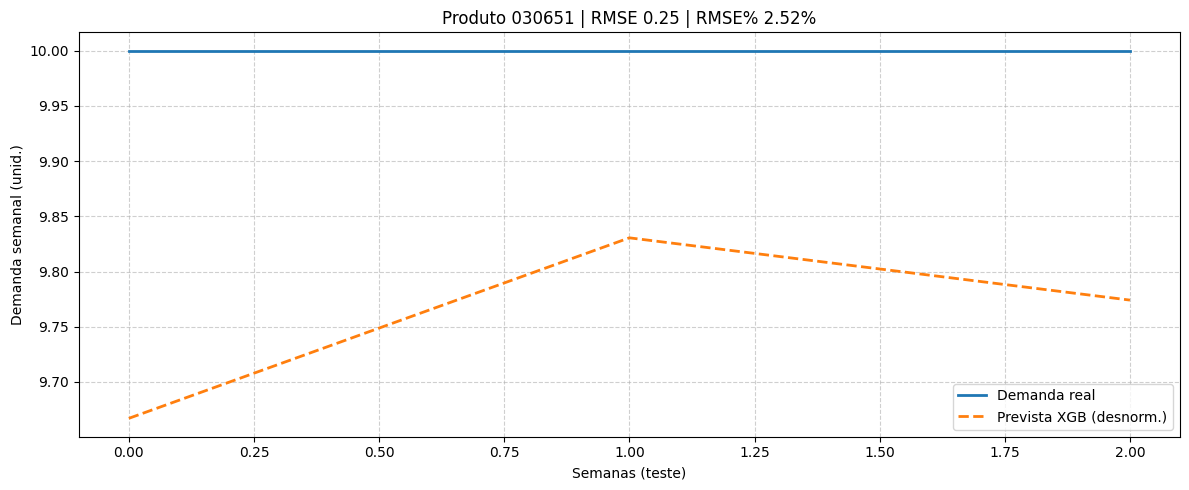

In [48]:
# ========= 18) PLOT DE UM PRODUTO =========
COD_PRODUTO_ALVO = '030651'     
serie = resultado_teste.query("cod_pro == @COD_PRODUTO_ALVO").copy().sort_values("dt_inicio_semana")
if len(serie) == 0:
    print(f"[aviso] Produto {COD_PRODUTO_ALVO} não tem amostras no conjunto de teste.")
else:
    serie["t"] = range(len(serie))
    rmse_a = np.sqrt(mean_squared_error(serie["demanda_real"], serie["demanda_prevista"]))
    dm_a   = serie["demanda_real"].mean()
    rmse_pct_a = rmse_a / dm_a * 100 if dm_a > 0 else np.nan
    plt.figure(figsize=(12,5))
    plt.plot(serie["t"], serie["demanda_real"], label="Demanda real", linewidth=2)
    plt.plot(serie["t"], serie["demanda_prevista"], "--", label="Prevista XGB (desnorm.)", linewidth=2)
    plt.title(f"Produto {COD_PRODUTO_ALVO} | RMSE {rmse_a:,.2f} | RMSE% {rmse_pct_a:,.2f}%")
    plt.xlabel("Semanas (teste)")
    plt.ylabel("Demanda semanal (unid.)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# #simu

In [39]:
from datetime import timedelta

grid = '''select codpro, qt_grid from"D-1".prd_loja where cd_loja = '01' '''
with psycopg2.connect(**conn_params) as conn:
    grid1 = pd.read_sql(grid, conn)

grid1 = grid1.rename(columns={'codpro': 'cod_pro'})
grid1['cod_pro'] = grid1['cod_pro'].astype(str)
demanda_diaria['cod_pro'] = demanda_diaria['cod_pro'].astype(str)

demanda_diaria = demanda_diaria.merge(
    grid1[['cod_pro', 'qt_grid']],
    on='cod_pro',
    how='left'
)
print(demanda_diaria.columns.tolist())

['cod_pro', 'data', 'vendas', 'receita', 'preco', 'devolucoes', 'demanda_liquida', 'ano_mes', 'segmento_volume', 'flag_ruptura', 'dt_inicio_semana', 'qt_grid']


In [40]:
demanda_diaria.head(20)

,cod_pro,data,vendas,receita,preco,devolucoes,demanda_liquida,ano_mes,segmento_volume,flag_ruptura,dt_inicio_semana,qt_grid
0,001077,2020-01-02,1.0,14.44,14.440,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,86.0
1,001353,2020-01-02,1.0,80.83,80.830,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,60.0
2,002490,2020-01-02,1.0,9.71,9.710,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,61.0
3,002570,2020-01-02,1.0,102.65,102.650,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,70.0
4,002640,2020-01-02,4.0,45.40,11.350,0.0,4.0,2020-01,medio_volume,0.0,2019-12-30,400.0
5,003413,2020-01-03,1.0,16.12,16.120,0.0,1.0,2020-01,medio_volume,0.0,2019-12-30,383.0
6,003691,2020-01-02,4.0,64.26,16.065,0.0,4.0,2020-01,alto_volume,0.0,2019-12-30,24828.0
7,004168,2020-01-04,1.0,8.15,8.150,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,396.0
8,004285,2020-01-02,1.0,47.24,47.240,0.0,1.0,2020-01,baixo_volume,0.0,2019-12-30,67.0
9,005422,2020-01-02,1.0,65.67,65.670,0.0,1.0,2020-01,medio_volume,0.0,2019-12-30,519.0


In [41]:

# ### PONTON - SIMULACAO

# %%
rel_venda = '''
select
        pp.cd_loja,
        pp.cod_pro,
        pp.qtde_ven as qtde,
        pp.dt_emissao,
        pp.preco,
        pp.vl_mc
from
        "D-1".prod_ped pp
left join
        "D-1".cliente c on pp.codcli = c.codcli
where 
        pp.tipped = 'V'
        and pp.dt_emissao >= current_date - 360
        and c.codcli not in ('13996','16100','18400','20000','02608','00270','20690','20691','20692','20693','21097')
        and pp.codvde not in ('0100','0001','0006','2319')
        and c.codarea <> '112'
        and c.codcid <> '0501' 
        and pp.cd_loja != '08'            
'''

# %%
rel_devolucao = '''
    SELECT
            pe.cd_produto AS cod_pro,
            pe.cd_loja,
            SUM(pe.qt_devolve) AS qtde,
            pe.dt_emissao
        FROM "D-1".prod_ent pe
        JOIN "D-1".entrada e
            ON e.cd_loja = pe.cd_loja
            AND e.sg_serie = pe.sg_serie
            AND e.nu_nota = pe.nu_nota
        JOIN "D-1".cliente cli
            ON cli.codcli = pe.cd_cliente
        WHERE
            e.dt_emissao >= current_date - 360
            AND e.in_cancela = 'N'
            AND e.in_clifor = 'C'
            AND UPPER(e.nfeenvstat) NOT LIKE '%%DENEG%%'
            AND pe.cd_cfop NOT IN ('1949', '2949', '1603')
            AND cli.codcli NOT IN ('21097')
            AND cli.codcid <> '0501'
            AND cli.codarea <> '112'
            AND pe.cd_loja != '08' 
        GROUP BY pe.cd_produto, pe.cd_loja, pe.dt_emissao    
                             
        '''
with psycopg2.connect(**conn_params) as conn:
    rel_venda = pd.read_sql(rel_venda, conn)
    rel_devolucao = pd.read_sql(rel_devolucao, conn)

#NOVO
rel_devolucao['qtde'] = rel_devolucao['qtde'].abs()
rel_devolucao['tipo'] = 'devolucao'
rel_devolucao['dt_emissao'] = pd.to_datetime(rel_devolucao['dt_emissao'], format='%Y-%m-%d')
rel_devolucao.drop(columns='cd_loja', inplace=True)

# NOVO
rel_venda['qtde'] = rel_venda['qtde'] 
rel_venda['tipo'] = 'venda'
rel_venda['dt_emissao'] = pd.to_datetime(rel_venda['dt_emissao'], format='%Y-%m-%d')
rel_venda.drop(columns='cd_loja', inplace=True)


# NOVO
sim_dados = pd.concat([rel_venda, rel_devolucao], ignore_index=True)
sim_dados = sim_dados.sort_values('dt_emissao')

#NOVO
sim_dados['qtde'] = sim_dados['qtde'].astype(int)

# %%
#Coloca qt_grid, maior ou 'Med Estoques '
reg_prod = demanda_diaria[['cod_pro', 'qt_grid']].copy()
reg_prod['qt_grid'] = reg_prod['qt_grid'].fillna(0)
reg_prod = reg_prod.set_index('cod_pro')['qt_grid'].to_dict()
 

# NOVO
data_venda = sim_dados[sim_dados.cod_pro.isin(reg_prod.keys())].copy()
data_venda['est_vir'] = None
data_venda['venda_perdida'] = None
data_venda['qtde'] = data_venda.apply(lambda x: -x.qtde if x.tipo == 'venda' else x.qtde, axis=1)
data_venda.sort_values('dt_emissao', inplace=True)

# %%
def reabastece(col):
    col.index = [str(ix)+'R' for ix in col.index.tolist()]
    if col.name == 'qtde':
        return 0
    elif col.name == 'dt_emissao':
        return col + timedelta(45)
    else:
        return col

# %%
data_venda_venda = data_venda[data_venda['tipo'] == 'venda'].copy()
data_compra = data_venda_venda.apply(reabastece)
data_compra['tipo'] = 'reabastecimento'

# %%
data_venda = data_venda.sort_index()
data_compra = data_compra.sort_index()

# %%
sim_loja8 = pd.concat([data_venda, data_compra])

# %%
sim_loja8['ordem'] = sim_loja8.groupby(['cod_pro', 'dt_emissao']).cumcount()

# Ordenar considerando ordem extra
sim_loja8 = sim_loja8.sort_values(by=['dt_emissao', 'cod_pro', 'ordem'])

# %%

pedido = dict()

# %%
def simulaVenda(row):
    global pedido
    now = reg_prod[row.cod_pro]
    if row.qtde == 0:
        order = float(pedido.get(row.name, 0)) 
    else:
        order = float(row.qtde)
    new = max(0, now + order)
    vp = min(0, now + order)
    repo = min(abs(order), now)
    row.est_vir = new
    row.venda_perdida = vp
    reg_prod.update({row.cod_pro:new})
    if order < 0:
        pedido.update({f'{row.name}R':repo})
    return row

# %%
sim_loja8 = sim_loja8.apply(simulaVenda, axis=1)

# %%
col_pedido = pd.DataFrame(pedido.values(), pedido.keys(), columns=['pedido'])
sim_loja8 = pd.concat([sim_loja8, col_pedido], ignore_index=False, axis=1).fillna(0)
sim_loja8['qtde'] = sim_loja8.qtde + sim_loja8.pedido
sim_loja8.drop(columns='pedido', inplace=True)

# %%
def atribui_prioridade(tipo):
    if tipo == 'venda':
        return 1  # Venda tem a maior prioridade
    elif tipo == 'devolucao':
        return 2  # Devolução tem a segunda prioridade
    elif tipo == 'reabastecimento':
        return 3  # Reabastecimento tem a menor prioridade
    return 4

# %%
sim_loja8['prioridade'] = sim_loja8['tipo'].apply(atribui_prioridade)

sim_loja8 = sim_loja8.sort_values(by=['dt_emissao', 'prioridade'])

sim_loja8.drop(columns='prioridade', inplace=True)

# %%
sim_loja8.drop(columns='ordem', inplace=True)

# %%
print(sim_loja8)

# %
print(sim_loja8.venda_perdida.abs().sum()/sim_loja8.qtde.apply(lambda x: abs(x) if x<0 else 0).sum()*100)

# %%
sim_loja8['preco'] = sim_loja8['preco'].fillna(0).astype(float)
sim_loja8['venda_perdida'] = sim_loja8['venda_perdida'].fillna(0)

sim_loja8['prejuizo_reais'] = sim_loja8['venda_perdida'].abs() * sim_loja8['preco']

prejuizo_total = sim_loja8['prejuizo_reais'].sum()

print(f'Prejuízo estimado por vendas perdidas: R$ {prejuizo_total:,.2f}')

# %%
sim_loja8['vl_mc'] = sim_loja8['vl_mc'].fillna(0).astype(float)
sim_loja8['venda_perdida'] = sim_loja8['venda_perdida'].fillna(0)

sim_loja8['margem'] = sim_loja8['venda_perdida'].abs() * sim_loja8['vl_mc']

margem_total = sim_loja8['margem'].sum()

print(f'margem das vendas perdidas: {margem_total:,.2f}')


         cod_pro  qtde dt_emissao  preco  vl_mc             tipo  est_vir  \
15125     000135  -1.0 2024-11-18  27.76   6.48            venda     28.0   
354       000136  -2.0 2024-11-18  22.13   4.51            venda     81.0   
25662     000136  -1.0 2024-11-18  23.42   5.05            venda     80.0   
28680     000136  -1.0 2024-11-18  23.42   5.05            venda     79.0   
52075     000136  -2.0 2024-11-18  22.13   4.51            venda     77.0   
...          ...   ...        ...    ...    ...              ...      ...   
2147923R  109760   4.0 2025-12-27  17.85   6.87  reabastecimento    836.0   
2149384R  109760   2.0 2025-12-27  17.85   6.87  reabastecimento    838.0   
2154792R  109760   2.0 2025-12-27  17.85   6.87  reabastecimento    840.0   
2144657R  109763   2.0 2025-12-27  17.45   6.71  reabastecimento    768.0   
2144630R  109764   3.0 2025-12-27  31.15  13.40  reabastecimento    264.0   

          venda_perdida  
15125               0.0  
354                 0.0